In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

directory = Path('decks')

df_decks = pd.DataFrame()

for file in directory.iterdir():

    if file.is_file():
        deck_name = file.name.split('_')[0]
        temp_df = pd.read_csv(file)
        deck_name_arr = list([deck_name] * len(temp_df))
        temp_df.insert(0, 'deck', deck_name_arr)

        temp_df = temp_df.drop(columns=['Rarity', 'Section', 'Last Updated', 'TcgPlayer ID', 'Image URL'])
        #display(temp_df.head())
        df_decks = pd.concat([df_decks, temp_df])


df_decks['Price'] = df_decks['Price'].str.replace('$', '').astype(float)


df_decks.insert(6, 'Total Price', df_decks['Price'] * df_decks['Count'])
display(df_decks.head(21))

,deck,Count,Name,Type,Cost,Price,Total Price,Scryfall ID
0,BW Enchantments Ping,4,Balemurk Leech,Creature - Leech,{1}{B},0.02,0.08,f0621b32-95c5-4f70-96cf-d46d20efc85d
1,BW Enchantments Ping,2,Bojuka Bog,Land,NaN,0.68,1.36,38834333-f9ea-43a8-b00a-17935d59eaea
2,BW Enchantments Ping,2,Derelict Attic // Widow's Walk,Enchantment - Room // Enchantment - Room,{2}{B} // {3}{B},0.04,0.08,2cae24c1-53f1-4f3f-8795-b634c46a17c4
3,BW Enchantments Ping,3,Dog Umbra,Enchantment - Aura,{1}{W},0.05,0.15,8d4ba710-eddb-40ca-b2fe-0e4e778aab9c
4,BW Enchantments Ping,1,Eagles of the North,Creature - Bird Soldier,{5}{W},0.12,0.12,c1bd3bc0-77bd-40fe-b4f1-835a04cb6e41
5,BW Enchantments Ping,4,Era of Enlightenment // Hand of Enlightenment,Enchantment - Saga // Enchantment Creature - H...,{1}{W},0.04,0.16,74f43827-2b9b-4fc9-a6e2-c682dfbf14f7
6,BW Enchantments Ping,4,Fear of Lost Teeth,Enchantment Creature - Nightmare,{B},0.06,0.24,259045fe-f349-4be1-bf29-465d084ed35e
7,BW Enchantments Ping,4,Forlorn Flats,Land - Desert,NaN,0.08,0.32,963c100e-4e12-438f-b5ae-14391406dff6
8,BW Enchantments Ping,4,Grand Entryway // Elegant Rotunda,Enchantment - Room // Enchantment - Room,{1}{W} // {2}{W},0.02,0.08,ef8a8ba7-f955-425d-9a16-816fc48a2a83
9,BW Enchantments Ping,4,Grim Guardian,Enchantment Creature - Zombie,{2}{B},0.49,1.96,732b5444-0410-430b-87ca-cf2d9f165bd7


In [2]:
df_inventory = pd.read_csv('Inventory_mikelele_2025.May.30.csv')
# display(df_inventory.loc[(df_inventory['Name'] == 'Lightning Bolt')])

df_inventory = df_inventory.drop(
    columns=[
        'Tradelist Count',
        'Decks Count Built',
        'Decks Count All',
        'Type',
        'Cost',
        'Rarity',
        'Price',
        'Image URL',
        'Edition',
        'Edition Code',
        'Card Number',
        'Condition',
        'Language',
        'Foil',
        'Signed',
        'Artist Proof',
        'Altered Art',
        'Misprint',
        'Promo',
        'Textless',
        'Printing Id', 
        'Printing Note',
        'Tags',
        'My Price',
        'Last Updated',
        'TcgPlayer ID'
        ])
display(df_inventory.loc[df_inventory['Name'] == 'Lightning Bolt'])

,Count,Name,Scryfall ID
1355,4,Lightning Bolt,ccee0b4c-0cb0-4c0f-8ddc-bc74b8b97273
1356,4,Lightning Bolt,cb9b9a9d-ae4c-4e04-bf9d-cae48f01292c
1357,1,Lightning Bolt,9521375e-0bc1-45ef-b513-6d332a25f9d2


In [ ]:
deck_names = np.array(df_decks['deck'].unique())
card_types = ['Creature', 'Instant', 'Sorcery', 'Artifact', 'Enchantment', 'Land']

df_deck_summarys = pd.DataFrame()

for deck in deck_names:
    deck_df = df_decks[df_decks['deck'] == deck]
    price = df_decks.loc[df_decks['deck'] == deck]['Total Price'].sum()
    summary = {'Deck': deck, 'Price': price}

    for ctype in card_types:
        # Boolean mask: rows where ctype is in the Type string
        mask = deck_df['Type'].str.contains(ctype, case=False, na=False)
        summary[ctype] = deck_df.loc[mask, 'Count'].sum()
    
    df_deck_summarys = pd.concat([df_deck_summarys, pd.DataFrame([summary])], ignore_index=True)


print(f"Your Battle Box collection has {len(deck_names)} decks and a total price of {round(df_deck_summarys['Price'].sum(), 2)}€")
display(df_deck_summarys)

# Sum all card type columns across all decks
card_type_sums = df_deck_summarys[['Creature', 'Instant', 'Sorcery', 'Artifact', 'Enchantment', 'Land']].sum()

# Convert to DataFrame and transpose
card_type_summary = card_type_sums.to_frame(name='Total in Decks')
card_type_summary.index.name = 'Card Type'
card_type_summary.reset_index(inplace=True)

display(card_type_summary.sort_values('Total in Decks', ascending=False))


Your Battle Box collection has 25 decks and a total price of 1103.51€


,Deck,Price,Creature,Instant,Sorcery,Artifact,Enchantment,Land
0,BW Enchantments Ping,27.97,29,0,7,0,41,18
1,cawGates,54.40,15,24,7,0,8,20
2,Cycling,205.33,27,29,3,11,0,12
3,Elves,53.32,39,5,11,4,2,13
4,Goblins,43.42,31,6,7,4,0,16
5,Grixis Affinity,68.70,15,26,2,38,1,19
6,Izzet Hot Dogs,62.79,12,27,19,0,0,17
7,Jund Wildfire,42.78,14,22,8,24,3,21
8,Kiln Fiend,49.74,12,26,10,0,0,16
9,Mono Black Devotion,43.28,22,10,12,4,9,19


,Card Type,Total in Decks
0,Creature,609
5,Land,417
1,Instant,388
2,Sorcery,250
3,Artifact,173
4,Enchantment,146


NameError: name 'df_deck_resumen' is not defined

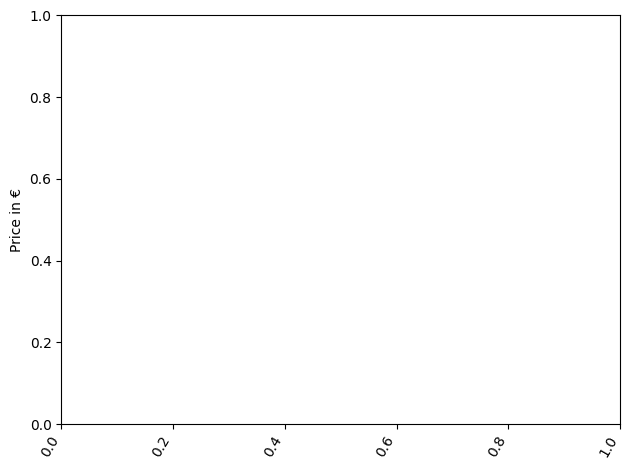

In [4]:
plt.ylabel('Price in €')
plt.xticks(rotation=60, ha='right')  # ha = horizontal alignment
plt.tight_layout()

sns.barplot(data=df_deck_resumen.sort_values('Price', ascending=False), x='Deck', y='Price')